In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

In [ ]:
import random
random.seed(42)

In [ ]:
def randNums(a,b,s):
    #finds n random ints in [a,b] with sum of s
    import numpy
    #select the number of layers randomly
    n = np.random.randint(3, 8, 1)
    hit = False
    while not hit:
      #declare number of layers and total thickness
        total, count = 0,0
      #declare a list to store the thicknesses
        nums = []
      #if the sum of the thicknesses is less than required
      #and number of layers is less tha  required
        while total < s and count < n:
          #generate a random number of layers
            r = np.random.randint(a,b)
            #add to total
            total += r
            #add 1 count
            count += 1
            #append to list
            nums.append(r)
        #if either of the 2 conditions are fulfiled, stop.
        if total == s and count == n: hit = True
    return nums

In [ ]:
#generate 10,000 train test data
ls = []

for i in range(10000):
  a = randNums(5, 25, 50)
  global_main = np.zeros((a[0], 10))
  for i in range(global_main.shape[0]):
    global_main[i].fill(np.random.lognormal(2.5, 1))
  for i in range(1, len(a)):
    new = np.zeros((a[i], 10))
    for i in range(new.shape[0]):
      new[i].fill(np.random.lognormal(2.5, 1))
    global_main = np.concatenate((global_main, new), axis=0)
  ls.append(global_main)

len(ls)
data_train = np.array(ls)
data_train.shape


(10000, 50, 10)

In [ ]:
#generate 1000 test test data
ls = []

for i in range(1000):
  a = randNums(5, 25, 50)
  global_main = np.zeros((a[0], 10))
  for i in range(global_main.shape[0]):
    global_main[i].fill(np.random.lognormal(2.5, 1))
  for i in range(1, len(a)):
    new = np.zeros((a[i], 10))
    for i in range(new.shape[0]):
      new[i].fill(np.random.lognormal(2.5, 1))
    global_main = np.concatenate((global_main, new), axis=0)
  ls.append(global_main)

len(ls)
data_test = np.array(ls)
data_test.shape

(1000, 50, 10)

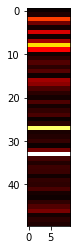

In [ ]:
#view thw geological model
plt.imshow(data_train[0], cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
#flatten data
data_train = data_train.reshape((len(data_train), np.prod(data_train.shape[1:])))
data_test = data_test.reshape((len(data_test), np.prod(data_test.shape[1:])))

In [ ]:
data_train.shape

(10000, 500)

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_train = min_max_scaler.fit_transform(data_train)
data_test = min_max_scaler.fit_transform(data_test)
input_img = keras.Input(shape=(500,))

#encoded and bottleneck layer
encoded = layers.Dense(100, activation='relu')(input_img)
encoded = layers.Dense(50, activation='relu')(encoded)
encoded = layers.Dense(10, activation='relu')(encoded)

#decoded and output layers
decoded = layers.Dense(50, activation='relu')(encoded)
decoded = layers.Dense(100, activation='relu')(decoded)
decoded = layers.Dense(500, activation='softmax')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')

autoencoder.fit(data_train, data_train, epochs=100, batch_size=100, shuffle = True, validation_data = (data_test, data_test), verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
decoded_imgs = autoencoder.predict(data_test)

In [ ]:
autoencoder.evaluate(data_test, decoded_imgs)

32/32 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 1.0000


[0.08401557058095932, 1.0]

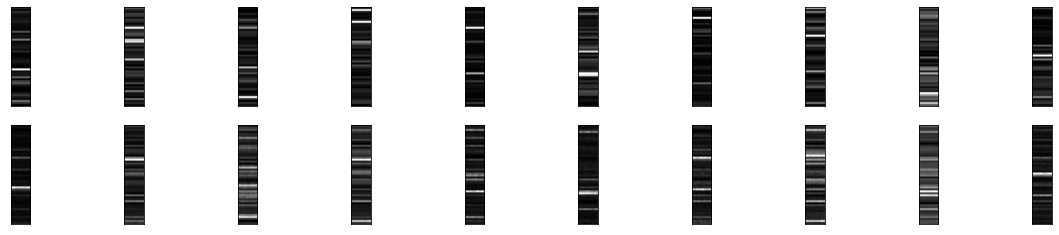

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(data_test[i].reshape(50, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(50, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()